In [4]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

# Append path for loading own packages
import sys
sys.path.append("../packages")

# Switch on inline plotting
%matplotlib inline

## Parameter set

In [5]:
# Horizontal feature pattern length in m
#pitch = np.array([50e-9, 100e-9, 400e-9])
pitch = np.array([100e-9])

# Horizontal feature size in m
hfs = 0.5 * pitch

# Vertical feature size
vfs = 0.5 * pitch

# 3D density of silicon in electrons per m^3
dens3_silicon = 7e29

# 3D density of grating in electrons per m^3
dens3_grating = dens3_silicon

# 3D density of foil (without grating) in electrons per m^3
dens3_foil = dens3_silicon

# Focus size (edge length) in m
focus_size = 2e-6

# Number of incoming photons
Nin = 10e10

# Target array resolution
#resolution = np.array([64, 128, 256])
resolution = np.array([256])

## Prepare target arrays

In [6]:
import edges
import grating
import auxiliary as aux

# List (of lists) of target arrays
a = []

# Number of different target resolutions
R = len(resolution)

# Number of different pitches
P = len(pitch)

for i in range(R):
    # List of target arrays
    aa = []
    
    # Create target coordinate array
    x  = np.linspace(0., focus_size, resolution[i], endpoint=False)
    xx = np.meshgrid(x, x)[0]
    
    for j in range(P):
        # Create grating function
        grating_function = grating.feature_grating(pitch[j], grating.symm_feat(hfs[j], edges.make_circular_edge(0.)))
        #grating_function = grating.feature_grating(pitch[j], grating.symm_feat(hfs[j], edges.perf_edge))
        
        # Create and enlist target array
        aa.append(grating_function(xx))
        
        # Apply physical factors to target array. Result: Pixel values are number of electrons within each pixel
        #   number_density * vertical_feature_size * projection_stretching * pixel_area
        aa[j] = aa[j] * dens3_grating * vfs[j] * np.sqrt(2) * (focus_size/resolution[i])**2
    
    # Enlist target array list
    a.append(aa)

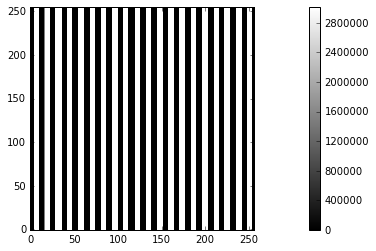

In [7]:
# Show target arrays
fig = plt.figure(figsize=(20, 4))
for i in range(R):
    for j in range(P):
        fig.add_subplot(R, P, i*P+j+1)
        aux.imshow(a[i][j])
        plt.colorbar()

In [8]:
# Save target array
#np.savetxt('grating_electrons.txt', a[0][0])

## Calculate scattering images

In [13]:
import scattering

# List (of lists) of scattering images
b  = []

# List (of lists) of scattering images calculated using Melanies formula
bM = []
for i in range(R):
    
    # List of scattering images
    bb  = []
    
    # List of scattering images calculated using Melanies formula
    bbM = []
    for j in range(int(P)):
        print("")
        print("resol: ", resolution[i], "   pitch: ", pitch[j])
        
        # Calculate and enlist scattering image
        bb.append(scattering.propagate(a[i][j], Nin, 155e-12, focus_size, 1., 1.))
        
        # Calculate and enlist scattering image, Melanies formula
        bbM.append(scattering.propagate_Melanie(a[i][j], Nin, focus_size/resolution[i], 1., 1., 1., 155e-12))
        print("sum Sct: ", np.sum(bb[i]), "= ", np.sum(bb[i])/np.sum(bbM[i]), "* sum Sct by Melanies formula")
    
    # Enlist lists
    b.append(bb)
    bM.append(bbM)


resol:  256    pitch:  1e-07
sum Sct:  23050755.2803 =  0.999999995495 * sum Sct by Melanies formula


/opt/pkg/devel/anaconda3/lib/python3.5/site-packages/scipy/fftpack/basic.py:150: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  z = zeros(s,x.dtype.char)


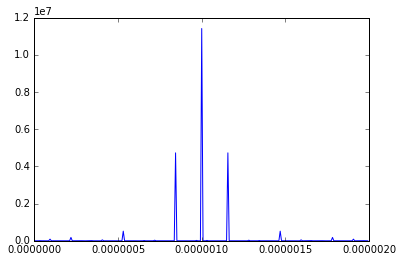

In [15]:
# Show scattering images
#fig = plt.figure(figsize=(20,20))
#plt.imshow(b, norm=LogNorm(vmin=1, vmax=1e2))
#plt.colorbar()

plt.plot(x, np.sum(b[0][0], axis=0))
plt.show()

In [ ]:
# Save scattering image
#np.savetxt('scattered_photons.txt', b[0])

In [ ]:
aux.imshow(np.log(b[0]+1))